## El tratamiento de las variables categóricas

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [6]:
mainpath = "C:/Users/dguai/Documents/Courses/Machine Learning Data Science en Python/Practicas/Repositorios/Datasets"
df = pd.read_csv(mainpath + "/" + "Ecom-expense/Ecom Expense.csv")

In [7]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [8]:
dummy_gender = pd.get_dummies(df["Gender"], prefix = "Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix = "City")

In [10]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [11]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [13]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [14]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [16]:
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [37]:
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Female", 
                "Gender_Male" ,"City_Tier 1", "City_Tier 2", "City_Tier 3", "Record"]

In [38]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]

In [39]:
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [40]:
print(lm.intercept_)
print(lm.coef_)

-79.4171303013718
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [41]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.1475389804920575),
 ('Transaction Time', 0.15494612549589482),
 ('Gender_Female', -131.02501325554584),
 ('Gender_Male', 131.02501325554607),
 ('City_Tier 1', 76.76432601049545),
 ('City_Tier 2', 55.13897430923249),
 ('City_Tier 3', -131.90330031972798),
 ('Record', 772.2334457445642)]

In [42]:
lm.score(X,Y)

0.9179923586131016

El modelo puede ser escrito como:
    Total_Spend = -79.4171303013718 + (Monthly Income * 0.1475389804920575) + .... + (Record * 772.2334457445642)

In [44]:
df_new["prediction"] = -79.4171303013718 + (df_new["Monthly Income"] * 0.1475389804920575) + (df_new["Transaction Time"] * 0.15494612549589482) + (df_new["Gender_Female"] *  -131.02501325554584) + (df_new["Gender_Male"] * 131.02501325554607) + (df_new["City_Tier 1"] * 76.76432601049545) + (df_new["City_Tier 2"] * 55.13897430923249) + (df_new["City_Tier 3"] * -131.90330031972798) + (df_new["Record"] * 772.2334457445642)

In [45]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [57]:
SSD = np.sum((df_new["prediction"] - df_new["Total Spend"])**2)
SSD

1517733985.3408167

In [58]:
RSE = np.sqrt(SSD/(len(df_new)-len(feature_cols)-1))

In [59]:
RSE

803.1318809818166

In [60]:
sales_mean = np.mean(df_new["Total Spend"])
sales_mean

6163.176415976714

In [61]:
error = RSE/sales_mean

In [62]:
error

0.13031135680294162

## Eliminar variables dummy redundantes

In [63]:
dummy_gender = pd.get_dummies(df["Gender"], prefix = "Gender").iloc[:,1:]

In [64]:
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [65]:
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix = "City").iloc[:,1:]
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [68]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [69]:
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Male" , "City_Tier 2", "City_Tier 3", "Record"]
X = df_new[feature_cols]
Y = df_new["Total Spend"]
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [70]:
print(lm.intercept_)

-133.67781754642328


In [71]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.1475389804920575),
 ('Transaction Time', 0.15494612549589792),
 ('Gender_Male', 262.05002651109425),
 ('City_Tier 2', -21.625351701262353),
 ('City_Tier 3', -208.66762633022284),
 ('Record', 772.2334457445638)]

In [72]:
lm.score(X,Y)

0.9179923586131016

# Transformación de variables para conseguir una relación no lineal

In [73]:
mainpath = "C:/Users/dguai/Documents/Courses/Machine Learning Data Science en Python/Practicas/Repositorios/Datasets"
data_auto = pd.read_csv(mainpath + "/" + "Auto/auto-mpg.csv")

In [74]:
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [75]:
data_auto.shape

(406, 9)

In [76]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'CV vs MPG')

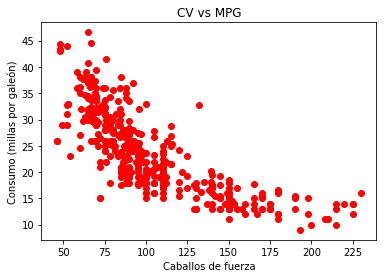

In [77]:
%matplotlib inline
data_auto["mpg"] = data_auto["mpg"].dropna()
data_auto["horsepower"] = data_auto["horsepower"].dropna()
plt.plot(data_auto["horsepower"], data_auto["mpg"], "ro")
plt.xlabel("Caballos de fuerza")
plt.ylabel("Consumo (millas por galeón)")
plt.title("CV vs MPG")

### Modelo de regresión lineal

* mpg = a + (b * horsepower) 

In [81]:
X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())

In [82]:
lm = LinearRegression()

In [83]:
lm.fit(X[:, np.newaxis],Y)

<ipython-input-83-68ce4aa26b94>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lm.fit(X[:, np.newaxis],Y)


LinearRegression()

In [84]:
type(X)

pandas.core.series.Series

In [86]:
type(X[:, np.newaxis])

<ipython-input-86-a245d0378a22>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  type(X[:, np.newaxis])


numpy.ndarray

<ipython-input-87-861a80057fba>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.plot(X, lm.predict(X[:, np.newaxis]), color = "blue")


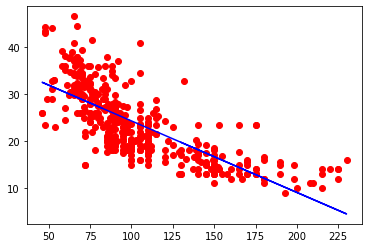

In [87]:
%matplotlib inline
plt.plot(X,Y, "ro")
plt.plot(X, lm.predict(X[:, np.newaxis]), color = "blue")

In [89]:
X_data = X[:, np.newaxis]
lm.score(X_data, Y)

<ipython-input-89-10b35fdddedd>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data = X[:, np.newaxis]


0.574653340645025

In [92]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
Y_mean = np.mean(Y)
error = RSE/Y_mean
SSD, RSE, Y_mean , error*100

(10315.75196006092, 5.046879480825511, 23.51457286432162, 21.46277336163346)

### Modelo de regresión cuadrático
* mpg = a + b * horsepower**2

In [93]:
X_data = X**2
X_data = X_data[:, np.newaxis]

<ipython-input-93-889f4aaa59eb>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data = X_data[:, np.newaxis]


In [94]:
lm = LinearRegression()
lm.fit(X_data, Y)

LinearRegression()

In [95]:
lm.score(X_data, Y)

0.4849887034823205

In [96]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
Y_mean = np.mean(Y)
error = RSE/Y_mean
SSD, RSE, Y_mean , error*100

(12490.350340501926, 5.553410772769817, 23.51457286432162, 23.6168898529981)

### Modelo de regresión lineal y cuadrático
   * mpg = a + (b * horsepower) + (c * horsepower**2) 

In [98]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [99]:
poly = PolynomialFeatures(degree = 2)

In [100]:
X_data = poly.fit_transform(X[:, np.newaxis])

<ipython-input-100-4521d78d054b>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data = poly.fit_transform(X[:, np.newaxis])


In [101]:
lm = linear_model.LinearRegression()
lm.fit(X_data, Y)

LinearRegression()

In [102]:
lm.score(X_data, Y)

0.6439066584257469

In [103]:
lm.intercept_

55.02619244708117

In [104]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

* mpg = 55.026 - (0.434 * hp) + (0.00112615 * (hp**2)

In [126]:
for d in range(2,6):
    poly = PolynomialFeatures(degree = d)
    X_data = poly.fit_transform(X[:, np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(X_data, Y)
    print("Regresión de grado " + str(d))
    print("R2: " + str(lm.score(X_data, Y)))
    print(lm.intercept_)
    print(lm.coef_)
    regresion_validation(X_data, Y, lm.predict(X_data))

Regresión de grado 2
R2: 0.6439066584257469
55.02619244708117
[ 0.         -0.43404318  0.00112615]
SSD: 8636.180643524502, RSE: 4.61778115803654, Y_mean: 23.51457286432162, Error: 19.63795466190689%
Regresión de grado 3
R2: 0.6444678885560744
58.448774111672336
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
SSD: 8622.56936742855, RSE: 4.614140736300908, Y_mean: 23.51457286432162, Error: 19.622473106036676%
Regresión de grado 4
R2: 0.6467674189704502
40.096643862907435
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
SSD: 8566.799832491353, RSE: 4.5991947315797574, Y_mean: 23.51457286432162, Error: 19.55891250126878%
Regresión de grado 5
R2: 0.65475124913688
-40.694028633738654
[ 0.00000000e+00  4.00021893e+00 -7.54802466e-02  6.19621640e-04
 -2.36220984e-06  3.41983153e-09]
SSD: 8373.171388781375, RSE: 4.546921734124122, Y_mean: 23.51457286432162, Error: 19.33661206758772%


<ipython-input-126-45e3718a2827>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data = poly.fit_transform(X[:, np.newaxis])
<ipython-input-126-45e3718a2827>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data = poly.fit_transform(X[:, np.newaxis])
<ipython-input-126-45e3718a2827>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data = poly.fit_transform(X[:, np.newaxis])
<ipython-input-126-45e3718a2827>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before in

In [124]:
def regresion_validation(X_data, Y, Y_pred):
    SSD = np.sum((Y - Y_pred)**2)
    RSE = np.sqrt(SSD/(len(X_data)-1))
    Y_mean = np.mean(Y)
    error = RSE/Y_mean
    print("SSD: " +str(SSD)+", RSE: " + str(RSE) +", Y_mean: " +  str(Y_mean) + ", Error: " + str(error*100) + "%")

### El problema de los outliers

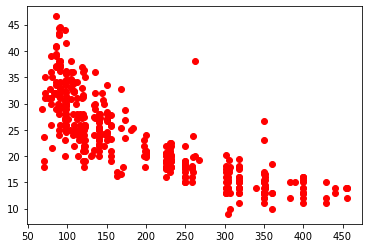

In [129]:
plt.plot(data_auto["displacement"], data_auto["mpg"], "ro")

In [130]:
X = data_auto["displacement"].fillna(data_auto["displacement"].mean())
X = X[:, np.newaxis]
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
lm = LinearRegression()
lm.fit(X, Y)

<ipython-input-130-cc6ec7c81be5>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:, np.newaxis]


LinearRegression()

In [131]:
lm.score(X,Y)

0.6261049762826918

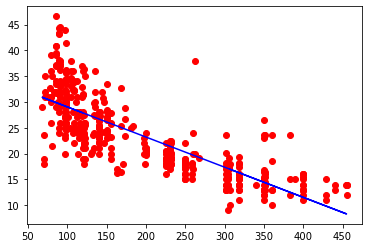

In [132]:
%matplotlib inline
plt.plot(X,Y, "ro")
plt.plot(X, lm.predict(X), color = "blue")

In [134]:
data_auto[(data_auto["displacement"] > 250) & (data_auto["mpg"] > 35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [136]:
data_auto[(data_auto["displacement"] > 300) & (data_auto["mpg"] > 20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [137]:
data_auto_clean = data_auto.drop([395,258,305,372])

In [138]:
X = data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean())
X = X[:, np.newaxis]
Y = data_auto_clean["mpg"].fillna(data_auto_clean["mpg"].mean())
lm = LinearRegression()
lm.fit(X, Y)

<ipython-input-138-72c5962f1045>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:, np.newaxis]


LinearRegression()

In [140]:
lm.score(X,Y)

0.6466514317531822

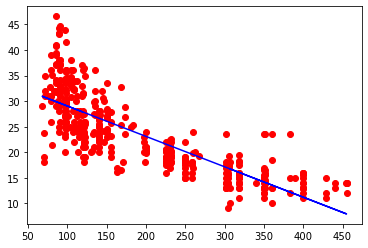

In [141]:
%matplotlib inline
plt.plot(X,Y, "ro")
plt.plot(X, lm.predict(X), color = "blue")